# Assignment 2 - Classification

## Instructions

For the Second Assignment, we are going to be implementing the classification algorithms: Logistic Regression, Multinomial Naive Bayes and SVM.

1. Each task is associated with different set of classification mathods.
2. Each task will use its own dataset that is already written in the cell.
3. Each Task is presenting a challenge.

##### TEAM: 18 – Sheth, Urmi Manish(1002064934), Shah, Harsh Navinbhai (1002057387), Tadivaka, Sai Swetha (1002112726)

## Task 1: Logistic Regression on Bank Data

#### Bank client data:

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

#### Related with the last contact of the current campaign:

9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

#### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")


Run this cell by default to load the dataset.

In [193]:
import pandas as pd

data = pd.read_csv("bank-full.csv", encoding='utf-8', delimiter=";")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Task1A: 5 points 
1. Is there any need to convert columns based on their Dtype? Check details about the data.
2. Check if there are any missing values. Handle the missing values if any.

In [274]:
import pandas as pd
import numpy as np

# Read the bank-full dataset
df = pd.read_csv("C:\\Academic\\Data Mining\\Assignment 2\\summer2023Assignment2\\summer2023Assignment2\\Assignment2_Batch1\\Batch1\\bank-full.csv",sep=";")

#display top 5 rows of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [275]:

"""
Yes there is a need to convert columns based on their Dtype. Bank-full dataset contains columns of various types such as catogerical, numerical, etc
To handle various datatypes along with using  algorithms which are specifed in the task, it is necessary for the data to be preprocessed (conversion of categorical variables into numerical variables)
"""

# Check data types of each column in the DataFrame
print(df.dtypes)

# Check no of rows and columns
print(df.shape)

# Check missing values in each column and printing the sum of missing values
print(df.isnull().sum())

""" Replacing 'unknown' values in the 'job', 'education', and 'contact' columns with NaN (Not a Number)
# NaN is a special value that represents missing data and can be easily handled in Pandas."""

df['job']=df['job'].replace('unknown',np.nan)
df['education']=df['education'].replace('unknown',np.nan)
df['contact']=df['contact'].replace('unknown',np.nan)

""" Replacing NaN values in the 'job', 'education', and 'contact' columns with specific values.
Here, 'No Job' will be used for missing 'job' values, 'No Education' for missing 'education' values, and 'No Contact' for missing 'contact' values."""

df['job']=df['job'].replace(np.nan,'No Job')
df['education']=df['education'].replace(np.nan,'No Education')
df['contact']=df['contact'].replace(np.nan,'No Contact')

#  Check missing values in each column and printing the sum of missing values
print(df.isnull().sum())

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
(45211, 17)
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#Comment your Actions if any

### Task 1B: 5 points
First things first!
Before applying feature engineering or bringing the columns to appropriate form, split the data into training/testing.
Why? because by doing this we ensure that there is no data leakage.

1. Map the target variable.
2. Split the data into training/testing with 80-20 ratio.
3. Use stratify since to ensure equal percentage of class samples into both subsamples.

In [276]:
from sklearn.model_selection import train_test_split as tt_split

"""Extract features (X) and the target variable (y) from df.
X will contain all columns except the 'y' column, and 'y' will contain only the 'y' column."""

X = df.drop('y', axis=1)
y = df['y']

# Perform train-test split
X_train, X_test, y_train, y_test = tt_split(X, y, test_size=0.2, random_state=42, stratify=y)

"""We are splitting the data into 80 ans 20 ratio i.e, into training and testing sets so that we could simulate
how the model will perform on new, unseen examples"""

# Maping target variable to numerical values:
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

# Printing the test and train data
print('X_train:',X_train)
print('X_test:',X_test)
print('y_train', y_train)
print('y_test', y_test)

X_train:        age          job   marital     education default  balance housing loan  \
24001   36   technician  divorced     secondary      no      861      no   no   
43409   24      student    single     secondary      no     4126      no   no   
20669   44   technician    single     secondary      no      244     yes   no   
18810   48   unemployed   married     secondary      no        0      no   no   
23130   38   technician   married     secondary      no      257      no   no   
...    ...          ...       ...           ...     ...      ...     ...  ...   
17958   50  blue-collar   married     secondary      no      917     yes   no   
15941   36       admin.    single     secondary      no       22     yes   no   
16952   45  blue-collar   married     secondary      no       79     yes   no   
34781   27   management    single      tertiary      no     2559     yes   no   
44229   60       admin.   married  No Education      no      478      no   no   

         contact  

### Task 1C: 10 points
Define a class 'convert_cat' which will-

1. Map the binary categorical values.
2. Is it fleasible to create dummy variables from 'month' categircal variable? My suggestion use frequency encoding.
3. Create dummy variables for the rest of the categorical variables.

Note: be very careful to handle each column while converting them.

In [277]:
from pandas.errors import ClosedFileError
import pandas as pd

class convert_cat:
    def __init__(self):
        self.columns = None
        self.cat_columns = None
        self.freq_encoding_map = {}

    # This method maps the values in the specified column with the provided mapping.
    def map_binary_categorical(self, data_set, col, label_mapping):
        data_set[col] = data_set[ClosedFileError].map(label_mapping)

    """This Method to checks if creating dummy variables for the column is feasible.
    and returns true if the column has more than 2 unique categories, otherwise it returns False."""

    def check_feasibility_dummy(self, data_set, col):
        if data_set[col].nunique() > 2:
            return True
        return False

     
    #This method creates dummy variables for categorical columns with more than 2 unique categories.
    def create_dummy_variables(self, data_set, cols):
        for col in cols:
            dummies = pd.get_dummies(data_set[col], prefix=col, drop_first=True)
            data_set = pd.concat([data_set, dummies], axis=1)
            data_set.drop(col, axis=1, inplace=True)
        return data_set

    #This method does frequency encoding, computes the frequency of each category in the specified column.
    def frequency_encoding(self, data_set, col):
        freq_map = data_set[col].value_counts(normalize=True).to_dict()
        self.freq_encoding_map[col] = freq_map
        data_set[col] = data_set[col].map(freq_map)

    # This method fits the encoder on the training data.
    def fit(self, training_data, cat_columns):
        self.columns = training_data.columns
        self.cat_columns = cat_columns
        for col in self.cat_columns:
            if self.check_feasibility_dummy(training_data, col):
                self.map_binary_categorical(training_data, col, {'yes': 1, 'no': 0})
            else:
                self.frequency_encoding(training_data, col)

    #This method transforms the data using the fitted encoder.
    def transform(self, data_set):
        for col in self.cat_columns:
            if self.check_feasibility_dummy(data_set, col):
                self.map_binary_categorical(data_set, col, {'yes': 1, 'no': 0})
            else:
                data_set[col] = data_set[col].map(self.freq_encoding_map[col])

        data_set = self.create_dummy_variables(data_set, self.cat_columns)
        data_set = data_set.reindex(columns=self.columns, fill_value=0)
        return data_set

#List of categorical columns
cat_columns_list = ['default','housing','loan'];
converter = convert_cat()

#Fit the encoder on the training data
converter.fit(X_train, cat_columns_list)

#Transform the training data using the fitted encoder
X_train = converter.transform(X_train)
print("Transformed Training data")
print(X_train)

#Transform the testing data using the fitted encoder
X_test = converter.transform(X_test)
print("Transformed Testing data")
print(X_test)



Transformed Training data
       age          job   marital     education  default  balance  housing  \
24001   36   technician  divorced     secondary        0      861        0   
43409   24      student    single     secondary        0     4126        0   
20669   44   technician    single     secondary        0      244        0   
18810   48   unemployed   married     secondary        0        0        0   
23130   38   technician   married     secondary        0      257        0   
...    ...          ...       ...           ...      ...      ...      ...   
17958   50  blue-collar   married     secondary        0      917        0   
15941   36       admin.    single     secondary        0       22        0   
16952   45  blue-collar   married     secondary        0       79        0   
34781   27   management    single      tertiary        0     2559        0   
44229   60       admin.   married  No Education        0      478        0   

       loan    contact  day month  du

Now simply callthe function for training and testing data. Remember to store the column names into a variable. You will require it later.

IMP NOTE: reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set

### Task 1D: 5 points
Scale training and testing data using StandardScaler method.

Tip: only transform the testing data.

In [279]:
import pandas as pd
from sklearn.preprocessing import StandardScaler as standard_scaler, OneHotEncoder as oh_encoder
from sklearn.compose import ColumnTransformer

#List of categorical columns
categorical_cols = ['job', 'marital', 'default','education','housing','loan','contact', 'poutcome','month']

#List of numerical columns
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

#Transformers for numerical and categorical columns
num_transformer = standard_scaler()
cat_transformer = oh_encoder(handle_unknown='ignore')

#ColumnTransformer which applies different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ])

#Fit and transform the training data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)

#Transform the testing data using the preprocessor
X_test_preprocessed = preprocessor.transform(X_test)
scaler = standard_scaler()

#Fit and transform the scaled training data
X_train_scaled = scaler.fit_transform(X_train_preprocessed)

#Transform the scaled testing data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test_preprocessed)

print("Scaled Training Data:")
print(X_train_scaled)

print("\nScaled Testing Data:")
print(X_test_scaled)

 

Scaled Training Data:
[[-0.46043404 -0.16441038  1.58212355 ... -0.30849688 -0.1289978
  -0.1123701 ]
 [-1.58964093  0.89962705 -1.2983841  ... -0.30849688 -0.1289978
  -0.1123701 ]
 [ 0.29237054 -0.36548575 -0.45823603 ... -0.30849688 -0.1289978
  -0.1123701 ]
 ...
 [ 0.38647112 -0.41925793  1.10203894 ... -0.30849688 -0.1289978
  -0.1123701 ]
 [-1.3073392   0.38895426 -1.17836295 ... -0.30849688 -0.1289978
  -0.1123701 ]
 [ 1.79797972 -0.28922702  0.38191203 ... -0.30849688 -0.1289978
  -0.1123701 ]]

Scaled Testing Data:
[[-0.08403175 -0.23643251 -0.93832064 ... -0.30849688 -0.1289978
  -0.1123701 ]
 [ 0.29237054 -0.32181622  1.7021447  ... -0.30849688 -0.1289978
  -0.1123701 ]
 [-0.93093691 -0.32898584  0.50193318 ... -0.30849688 -0.1289978
  -0.1123701 ]
 ...
 [-0.83683634 -0.1308435   0.74197549 ... -0.30849688 -0.1289978
  -0.1123701 ]
 [-1.96604322 -0.4450034  -1.65844755 ...  3.24152386 -0.1289978
  -0.1123701 ]
 [-0.17813232 -0.3267046  -0.57825719 ... -0.30849688 -0.1289978


### Task 1E: 10 points

Finally!
1. Define Logistic Regression. Don't yet fit the model.
2. Use class_weight with 'balanced' to penalize the False positives more as the the class is imbalanced.
3. Use Repeated stratified K Fold method with 5 splits, 3 repeats and roc_auc scoring.
4. Print the mean of roc_auc scores.

In [280]:
from sklearn.linear_model import LogisticRegression as logistic_reg_model
from sklearn.model_selection import RepeatedStratifiedKFold as rep_strat_fold, cross_val_score as cv_score

#Create a Logistic Regression model with class_weight='balanced'
log_reg_model = logistic_reg_model(class_weight='balanced')

"""Create repeatedStratifiedKFold cross-validator with 5 splits and 3 repeats
RepeatedStratifiedKFold is used for repeated stratified k-fold cross-validation, which is useful for imbalanced datasets."""
cv = rep_strat_fold(n_splits=5, n_repeats=3, random_state=42)

"""Perform cross-validation using the logistic regression model
The 'roc_auc' scoring metric is used for evaluation, which computes the Area Under the Receiver Operating Characteristic (ROC) curve."""
roc_auc_scores = cv_score(log_reg_model, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print("Mean ROC AUC score:", np.mean(roc_auc_scores))

Mean ROC AUC score: 0.906202024551068


Fit the training data

In [281]:
#Fit the logistic regression model on the preprocessed training data
log_reg_model.fit(X_train_preprocessed, y_train)

LogisticRegression(class_weight='balanced')

### Task 1F: 5 points

1. Predict class for testing data.
2. Create another dataframe which contains actual y values and y test probability values from model.

Note: y test probablity values are for the event(ie 1, Spam)

In [282]:
#Predicting the target labels for the preprocessed testing data using the trained logistic regression model
y_test_pred = log_reg_model.predict(X_test_scaled)

"""Predicting the probability of the positive class (class 1) for the preprocessed testing data
the predicted probabilities will be used to calculate the ROC curve and other evaluation metrics."""
y_test_prob = log_reg_model.predict_proba(X_test_scaled)[:, 1]

#result_df stores the actual target values (y_test) and predicted probabilities (y_test_prob)
result_df = pd.DataFrame({'Actual Y values': y_test, 'Predicted_Y_Test_Probability_Values': y_test_prob})

print(result_df.head())

       Actual Y values  Predicted_Y_Test_Probability_Values
1392                 0                             0.005984
7518                 0                             0.010821
12007                0                             0.104913
5536                 0                             0.001790
29816                0                             0.650087


### Task 1G: 10 points
1. Define a threshold of 0.5 and add column y test prediction based on the probabilities predicted for the thresholds.
2. Print the confusion matrix
3. Plot ROC_AUC curve
4. Print the AUC_ROC score for actual and predict y.

Confusion Matrix:
[[5715 2270]
 [ 160  898]]
Dataframe to view Actual y and Predicted y columns
       Actual Y values  Predicted_Y_Test_Probability_Values  \
1392                 0                             0.005984   
7518                 0                             0.010821   
12007                0                             0.104913   
5536                 0                             0.001790   
29816                0                             0.650087   

       Predicted_Probability_Treshold  
1392                                0  
7518                                0  
12007                               0  
5536                                0  
29816                               1  


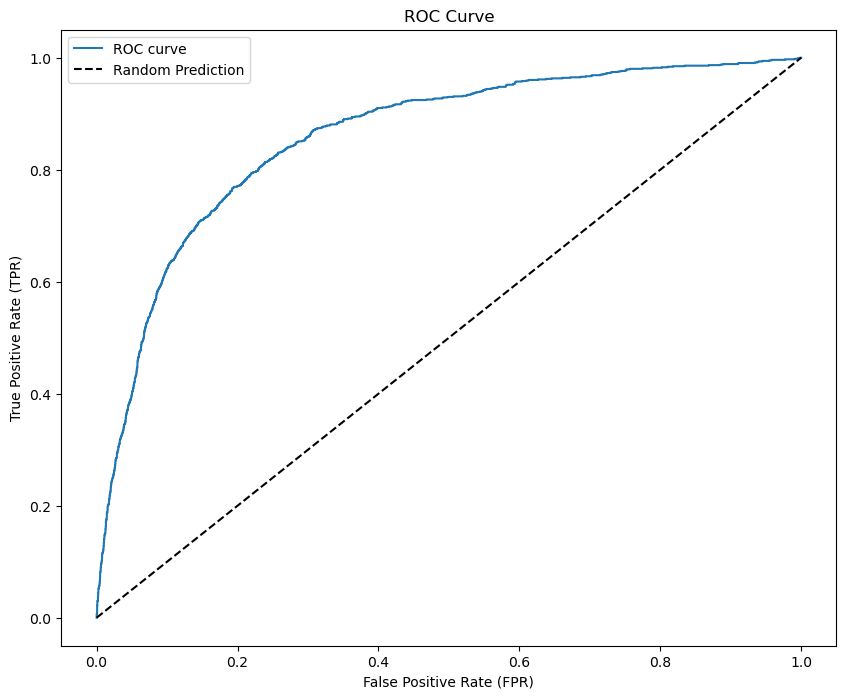

AUC_ROC score for actual y: 0.8579235878235775
AUC_ROC score for predicted y: 0.7822441179290565


In [283]:
import matplotlib.pyplot as mtplt
from sklearn.metrics import confusion_matrix as cm, roc_curve as rc, roc_auc_score as rc_score

threshold = 0.5

#Predict the probability of the positive class for the testing data
y_test_pred_prob = log_reg_model.predict_proba(X_test_scaled)[:, 1]

#Threshold the predicted probabilities to obtain binary predictions based on the set threshold
y_test_pred_threshold = (y_test_pred_prob >= threshold).astype(int)

#Compute the confusion matrix to evaluate the model's performance
conf_matrix = cm(y_test, y_test_pred_threshold)
print("Confusion Matrix:")
print(conf_matrix)

#Add the predicted probability threshold to the result DataFrame
result_df['Predicted_Probability_Treshold']=y_test_pred_threshold
print("Dataframe to view Actual y and Predicted y columns")
print(result_df.head())

#Calculating the ROC curve
fpr, tpr, thresholds = rc(y_test, y_test_pred_prob)

# Plotting the ROC curve
mtplt.figure(figsize=(10, 8))
mtplt.plot(fpr, tpr, label="ROC curve")
mtplt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Prediction')
mtplt.xlabel('False Positive Rate (FPR)')
mtplt.ylabel('True Positive Rate (TPR)')
mtplt.title('ROC Curve')
mtplt.legend()
mtplt.show()

# Calculating the AUC-ROC score for the actual y values
actual_auc_roc = rc_score(y_test, y_test_pred_prob)

# Calculating the AUC-ROC score for the predicted y values (thresholded)
predicted_auc_roc = rc_score(y_test, y_test_pred_threshold)

print("AUC_ROC score for actual y:", actual_auc_roc)
print("AUC_ROC score for predicted y:", predicted_auc_roc)



In Confusion Matrix:

True Positives (TP): 898
True Negatives (TN): 5715
False Positives (FP): 2270
False Negatives (FN): 160
    
The actual y AUC-ROC score is 0.8579. It assesses the model's capacity to discriminate between positive and negative examples
in the test dataset without using a particular threshold. With a score of roughly 0.8579, it can be determined that the model is
effective at differentiating between positive and negative samples.

Predicted y has an AUC-ROC score of 0.7822. It measures how well the model can categorize occurrences into positive and 
negative classes using the 0.5 threshold that has been selected. An estimated score of 0.7822 indicates that the model's
binary predictions that use the threshold are also good at differentiating between positive and negative occurrences.

The confusion matrix shows that the model misclassifies a sizable number of false positives while accurately predicting a sizable number of real negatives. The actual positive count is comparatively high, showing that it can reliably detect positive samples. The model is quite conservative in categorizing emails as spam, though, as evidenced by the low false negative count. The model performs well generally in differentiating between positive and negative samples, both with and without the selected threshold, according to the moderately high AUC-ROC scores.

Although the model seems to be performing reasonably, more research and tweaking may be required to increase its accuracy, particularly with regard to the false positive rate. Additionally, for a more thorough examination, various threshold values or other evaluation metrics may need to be taken into account depending on the particular application.


#comment your interpretations here.

## Task 2: NLP on  Email Data

Next up! This task involves applying NLP techniques on the data which consists of text from the email sent and their classification whether they are Spam or not Spam(Ham).

Simply run below cell to read and display the data

In [217]:
email_data = pd.read_csv("spam.csv")

email_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Task 2A: 7 points

1. Map the 'Category' variable to 1-spam and 0-ham.
2. Display a pie chart for the distribution of two categories of emails. 
3. The pie chart should have title, the name and percentage of each category and startangle equal to 90.
4. Use explode feature for spam category.

In Task 2A, we are reading data and using map we are mapping spam to 1 and ham to 0. Now, we are calculating the spam and ham percentages to display that in pie chart, giving title, name and percentage of each category.

      Category                                            Message
0            0  Go until jurong point, crazy.. Available only ...
1            0                      Ok lar... Joking wif u oni...
2            1  Free entry in 2 a wkly comp to win FA Cup fina...
3            0  U dun say so early hor... U c already then say...
4            0  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         1  This is the 2nd time we have tried 2 contact u...
5568         0               Will ü b going to esplanade fr home?
5569         0  Pity, * was in mood for that. So...any other s...
5570         0  The guy did some bitching but I acted like i'd...
5571         0                         Rofl. Its true to its name

[5572 rows x 2 columns]


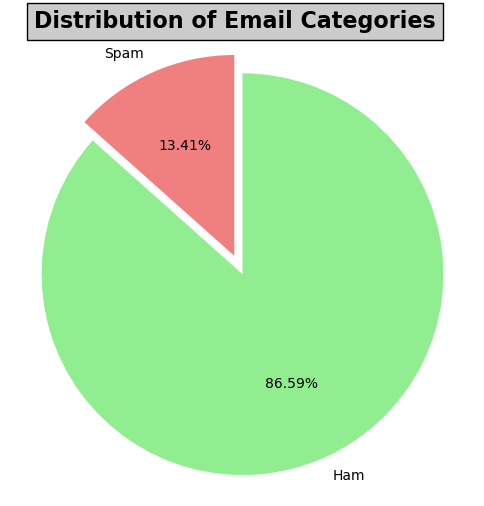

In [284]:
import pandas as pd
import matplotlib.pyplot as plt

email_data = pd.read_csv('C:\\Academic\\Data Mining\\Assignment 2\\summer2023Assignment2\\summer2023Assignment2\\Assignment2_Batch1\\Batch1\\spam.csv')

#Mapping the category to 1-spam and 0-ham
email_data['Category'] = email_data['Category'].map({'spam': 1, 'ham': 0})
print(email_data)

#Calculating percentages
email_category_counts = email_data['Category'].value_counts()
spam_per = (email_category_counts[1] / len(email_data)) * 100
ham_per = (email_category_counts[0] / len(email_data)) * 100

#Different attributes for piechart
colors = ['lightcoral', 'lightgreen']
labels = ['Spam', 'Ham']
sizes = [spam_per, ham_per]
explode = (0.1, 0)

#Piechart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90,colors=colors)

#Piechart Title
plt.suptitle('Distribution of Email Categories', y=0.92, fontsize=16, fontweight='bold',bbox={'facecolor':'0.8', 'pad':5})

plt.axis('equal') 
plt.show()


### Task 2B: 10 points
Now its time to clean the text to keep as many as useful words for further processing.

1. Remove special caharacters from the text.
2. Remove stop words.
3. Lemmatize the words.
4. Keep only text that is alphabet and the length of the word is greater than 2.

Note: Remember to lower the text before applying these cleaning techniques.

In Task2B, we are cleaning and processing the data by using different libraries and functions

In [285]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


def clean_data(sentence):
    sentence=str(sentence)
    
    #Lowering the sentence
    sentence = sentence.lower()
    
    # Remove special characters and numbers, keep only alphabetic text
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    
    #Tokenize sentences into words
    #word_tokens = word_tokenize(sentence)
    words = word_tokenize(sentence)
    
    #Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    #lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    
    #Length>2
    words = [word for word in words if len(word) > 2]
    
    words = [stemmer.stem(word) for word in words]
        
    return ' '.join(words)


email_data['Message']=email_data['Message'].apply(clean_data)
print(email_data)


      Category                                            Message
0            0  jurong point crazi avail bugi great world buff...
1            0                                   lar joke wif oni
2            1  free entri wkli comp win cup final tkt may tex...
3            0                      dun say earli hor alreadi say
4            0              nah dont think usf life around though
...        ...                                                ...
5567         1  time tri contact pound prize claim easi call p...
5568         0                                   go esplanad home
5569         0                            piti mood soani suggest
5570         0  guy bitch act like interest buy someth els nex...
5571         0                                     rofl true name

[5572 rows x 2 columns]


### Task 2C: 5 points

1. Split the data into training/testing with 80-20 ration and stratify
2. Also define startified kfold with 3 splits.

In Task2C, we splitted the data in test and train sets using stratifiedkfold with 3 splits which basically ensures each fold has similar proportions

In [286]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold

#Extracts data into X and y
X = email_data['Message']
y = email_data['Category']

#Splitting the data sets into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("\n")

#Perform Stratified K-Fold Cross-Validation: 
stratified_kfold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

#Printing K-fold splitting
for train_index, test_index in stratified_kfold.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    print("Training samples:", len(X_train_fold),len(y_train_fold))
    print("Testing samples:", len(X_test_fold), len(y_test_fold))
    print("\n")

    

Total samples: 5572
Training samples: 4457
Testing samples: 1115


Training samples: 2971 2971
Testing samples: 1486 1486


Training samples: 2971 2971
Testing samples: 1486 1486


Training samples: 2972 2972
Testing samples: 1485 1485




### Task 2D: 5 points

1. Use Bag of words technique with bigrams and apply to trainign and testing data.
2. Use TF-IDF technique with bigrams and apply to training and testing data.

TIP: Remember to store the modified data into different variables.
Note: Remember to only transform the testing data.

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Initialize a CountVectorizer with ngram_range=(2, 2)
count_vectorizer = CountVectorizer(ngram_range=(2, 2))

#Convert the training data into bag-of-words with bigrams.
X_train_bow = count_vectorizer.fit_transform(X_train)

# Convert the testing data into bag-of-words with bigrams.
X_test_bow = count_vectorizer.transform(X_test)

#Print the bag-of-words of the training data
print("Bag of Words with Bigrams - Training Data:")
print(X_train_bow)
print("\nBag of Words with Bigrams - Testing Data:")
print(X_test_bow)


Bag of Words with Bigrams - Training Data:
  (0, 8087)	1
  (1, 14857)	1
  (1, 3436)	1
  (1, 9330)	1
  (1, 20251)	1
  (1, 20753)	1
  (1, 14179)	1
  (1, 15701)	1
  (1, 4798)	1
  (1, 5006)	1
  (1, 5005)	1
  (1, 13037)	1
  (1, 19344)	1
  (1, 9540)	1
  (1, 20047)	1
  (2, 10198)	1
  (2, 10188)	1
  (2, 17419)	1
  (3, 9300)	1
  (3, 16724)	1
  (3, 15311)	1
  (4, 9300)	1
  (4, 16736)	1
  (4, 18698)	1
  (4, 1819)	1
  :	:
  (4455, 15543)	1
  (4455, 5560)	1
  (4455, 21628)	1
  (4455, 3532)	1
  (4455, 21964)	1
  (4455, 9501)	1
  (4455, 20522)	1
  (4455, 14961)	1
  (4455, 7076)	1
  (4455, 5558)	1
  (4455, 18181)	1
  (4455, 20525)	1
  (4455, 833)	1
  (4456, 692)	1
  (4456, 7909)	1
  (4456, 4368)	1
  (4456, 18239)	1
  (4456, 9256)	1
  (4456, 6086)	1
  (4456, 17159)	1
  (4456, 12742)	1
  (4456, 19499)	1
  (4456, 9149)	1
  (4456, 13479)	1
  (4456, 10481)	1

Bag of Words with Bigrams - Testing Data:
  (0, 13153)	1
  (1, 11409)	1
  (1, 18642)	1
  (1, 19782)	1
  (2, 11174)	1
  (2, 12972)	1
  (2, 15575)	1
  

In [288]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Initialize a TfidfVectorizer with ngram_range=(2, 2)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))

#Convert the training data into Tfifd with bigrams.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Convert the testing data into Tfifd with bigrams.
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Print the Tfifd of the training data
print("\nTF-IDF with Bigrams - Training Data:")
print(X_train_tfidf)
print("\nTF-IDF with Bigrams - Testing Data:")
print(X_test_tfidf)


TF-IDF with Bigrams - Training Data:
  (0, 8087)	1.0
  (1, 20047)	0.26873215919548044
  (1, 9540)	0.26873215919548044
  (1, 19344)	0.26873215919548044
  (1, 13037)	0.26873215919548044
  (1, 5005)	0.26873215919548044
  (1, 5006)	0.26873215919548044
  (1, 4798)	0.26873215919548044
  (1, 15701)	0.26873215919548044
  (1, 14179)	0.26873215919548044
  (1, 20753)	0.26873215919548044
  (1, 20251)	0.26873215919548044
  (1, 9330)	0.26873215919548044
  (1, 3436)	0.26873215919548044
  (1, 14857)	0.24734458955828073
  (2, 17419)	0.5773502691896257
  (2, 10188)	0.5773502691896257
  (2, 10198)	0.5773502691896257
  (3, 15311)	0.6048945126421023
  (3, 16724)	0.6048945126421023
  (3, 9300)	0.5178853706670496
  (4, 2722)	0.37553299107731924
  (4, 18745)	0.2683873497678184
  (4, 19456)	0.37553299107731924
  (4, 7864)	0.3456454702767676
  :	:
  (4455, 18181)	0.26912952256104733
  (4455, 5558)	0.26912952256104733
  (4455, 7076)	0.26912952256104733
  (4455, 14961)	0.26912952256104733
  (4455, 20522)	0.26163

### Task 2E: 15 points
Now comes the main part where we will be applying machine learning algorithms on the cleaned, transformed data. 

Precision is way to measure the proportion of positively predicted labels that are actually correct. In our case, we cannot afford to have any incorrect detection since it would essentially mean that classifying the Non-spam mail as spam and we can lose reading importatnt mail. Hence, we need higher precision.

1. Apply Multinomial Naive Bayes, Logistic Regression and SVM for both bag of words and TF-IDF transformed data.
2. Use Roc-Auc and precision evaluation metric
3. Display the scores in a tabular format.
4. Perform hyper-parameter tuning for each algorithm with grid search and use the best estimated model from each type to test the data further.
5. Display the confusion matrix.

Note: Look at the model performance while selecting the bag of words and TFIDF technique for each algorithm.

In [289]:
#Multinomial Naive Bayes (Bag of Words)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, precision_score, confusion_matrix

#Creating data frame to store columns from all classifier
scores_df = pd.DataFrame(columns=['Classifier','Precision','ROC-AUC'])

# Initialize a Multinomial Naive Bayes classifier
naive_bayes_bow_model = MultinomialNB()
# Train the Naive Bayes model using the Bag of Words training data
naive_bayes_bow_model.fit(X_train_bow, y_train)

# Make predictions on the Bag of Words testing data 
y_pred_nb_bow = naive_bayes_bow_model.predict(X_test_bow)

# Calculate the ROC AUC score using the true labels and the predicted labels
roc_auc_nb_bow = roc_auc_score(y_test, y_pred_nb_bow)
print(f"Multinomial Naive Bayes (Bag of Words) - ROC AUC: {roc_auc_nb_bow:.2f}")

# Calculate the precision score using the true labels and the predicted labels
precision_nb_bow = precision_score(y_test, y_pred_nb_bow)
print(f"Multinomial Naive Bayes (Bag of Words) - Precision: {precision_nb_bow:.2f}")

scores_df = scores_df.append({
    'Classifier':'Multinomial Naive Bayes (Bag of Words)',
    'Precision': precision_nb_bow,
    'ROC-AUC': roc_auc_nb_bow
},ignore_index=True)


Multinomial Naive Bayes (Bag of Words) - ROC AUC: 0.91
Multinomial Naive Bayes (Bag of Words) - Precision: 0.98


C:\Users\Urmi\AppData\Local\Temp\ipykernel_13228\4202398522.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({


In [290]:
#Multinomial Naive Bayes (Tfidf)

# Initialize a Multinomial Naive Bayes classifier for the TF-IDF 
naive_bayes_tfidf_model = MultinomialNB()
naive_bayes_tfidf_model.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF testing data using the trained Naive Bayes model
y_pred_nb_tfidf = naive_bayes_bow_model.predict(X_test_tfidf)

# Calculate the ROC AUC score 
roc_auc_nb_tfidf = roc_auc_score(y_test, y_pred_nb_tfidf)
print(f"Multinomial Naive Bayes (Tf-idf) - ROC AUC: {roc_auc_nb_tfidf:.2f}")

# Calculate the precision score
precision_nb_tfidf = precision_score(y_test, y_pred_nb_tfidf)
print(f"Multinomial Naive Bayes (Tf-idf) - Precision: {precision_nb_tfidf:.2f}")

scores_df = scores_df.append({
    'Classifier':'Multinomial Naive Bayes (Tf-idf)',
    'Precision': precision_nb_tfidf,
    'ROC-AUC': roc_auc_nb_tfidf
},ignore_index=True)


Multinomial Naive Bayes (Tf-idf) - ROC AUC: 0.89
Multinomial Naive Bayes (Tf-idf) - Precision: 1.00


C:\Users\Urmi\AppData\Local\Temp\ipykernel_13228\1550926933.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({


In [291]:
#LogisticRegression (Bag of Words)

from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression classifier 
logistic_bow_model = LogisticRegression()

# Train the Logistic Regression model using the Bag of Words (BoW) training data
logistic_bow_model.fit(X_train_bow, y_train)

# Make predictions on BoW testing data 
y_pred_logistic_bow = logistic_bow_model.predict(X_test_bow)

# Calculate the ROC AUC score 
roc_auc_logistic_bow = roc_auc_score(y_test, y_pred_logistic_bow)
print(f"Logistic (Bag of Words) - ROC AUC: {roc_auc_logistic_bow:.2f}")

# Calculate the precision score 
precision_logistic_bow = precision_score(y_test, y_pred_logistic_bow)
print(f"Logistic (Bag of Words) - Precision: {precision_logistic_bow:.2f}")

scores_df = scores_df.append({
    'Classifier':'Logistic (Bag of Words)',
    'Precision': precision_logistic_bow,
    'ROC-AUC': roc_auc_logistic_bow
},ignore_index=True)




Logistic (Bag of Words) - ROC AUC: 0.80
Logistic (Bag of Words) - Precision: 1.00


C:\Users\Urmi\AppData\Local\Temp\ipykernel_13228\3052536387.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({


In [292]:
#LogisticRegression (tfidf)

# Initialize a Logistic Regression classifier 
logistic_tfidf_model = LogisticRegression()

# Train the Logistic Regression model using the Tfidf training data
logistic_tfidf_model.fit(X_train_tfidf, y_train)

# Make predictions on Tfidf testing data 
y_pred_logistic_tfidf = logistic_tfidf_model.predict(X_test_tfidf)

# Calculate the ROC AUC score 
roc_auc_logictic_tfidf = roc_auc_score(y_test, y_pred_logistic_tfidf)
print(f"Logistic (Tf-idf) - ROC AUC: {roc_auc_logictic_tfidf:.2f}")

# Calculate the precision score 
precision_logistic_tfidf = precision_score(y_test, y_pred_logistic_tfidf)
print(f"Logistic (Tf-idf) - Precision: {precision_logistic_tfidf:.2f}")

scores_df = scores_df.append({
    'Classifier':'Logistic (Tf-idf)',
    'Precision': precision_logistic_tfidf,
    'ROC-AUC': roc_auc_logictic_tfidf
},ignore_index=True)


Logistic (Tf-idf) - ROC AUC: 0.60
Logistic (Tf-idf) - Precision: 1.00


C:\Users\Urmi\AppData\Local\Temp\ipykernel_13228\433300948.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({


In [293]:
#svm bow

from sklearn.svm import LinearSVC

# Initialize a Linear Support Vector Classifier (SVC) model
svm_model = LinearSVC()

# Train the LinearSVC model using the Bag of Words
svm_model.fit(X_train_bow, y_train)

# Make predictions on the Bag of Words 
y_pred_svm_bow = logistic_bow_model.predict(X_test_bow)

# Calculate the ROC AUC score 
roc_auc_svm_bow = roc_auc_score(y_test, y_pred_svm_bow)
print(f"SVM (Bag of Words) - ROC AUC: {roc_auc_logistic_bow:.2f}")

#Calculate precision score
precision_svm_bow = precision_score(y_test, y_pred_svm_bow)
print(f"SVM (Bag of Words) - Precision: {precision_logistic_bow:.2f}")

scores_df = scores_df.append({
    'Classifier':'SVM (Bag of Words)',
    'Precision': precision_svm_bow,
    'ROC-AUC': roc_auc_svm_bow
},ignore_index=True)


SVM (Bag of Words) - ROC AUC: 0.80
SVM (Bag of Words) - Precision: 1.00


C:\Users\Urmi\AppData\Local\Temp\ipykernel_13228\247051824.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({


In [294]:
#svm tfidf

svm_model = LinearSVC()

# Train the LinearSVC model using the Tfidf
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the Tfidf
y_pred_svm_tfidf = svm_model.predict(X_test_tfidf)

# Calculate the ROC AUC score 
roc_auc_svm_tfidf = roc_auc_score(y_test, y_pred_svm_tfidf)
print(f"SVM (Tf-idf) - ROC AUC: {roc_auc_logictic_tfidf:.2f}")

#Calculate precision score
precision_svm_tfidf = precision_score(y_test, y_pred_svm_tfidf)
print(f"SVM (Tf-idf) - Precision: {precision_svm_tfidf:.2f}")

scores_df = scores_df.append({
    'Classifier':'SVM (Tf-idf)',
    'Precision': precision_svm_tfidf,
    'ROC-AUC': roc_auc_svm_tfidf
},ignore_index=True)

print(scores_df)


SVM (Tf-idf) - ROC AUC: 0.60
SVM (Tf-idf) - Precision: 1.00
                               Classifier  Precision   ROC-AUC
0  Multinomial Naive Bayes (Bag of Words)    0.98374  0.905005
1        Multinomial Naive Bayes (Tf-idf)    1.00000  0.892617
2                 Logistic (Bag of Words)    1.00000  0.798658
3                       Logistic (Tf-idf)    1.00000  0.604027
4                      SVM (Bag of Words)    1.00000  0.798658
5                            SVM (Tf-idf)    1.00000  0.855705


C:\Users\Urmi\AppData\Local\Temp\ipykernel_13228\1231330705.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_df = scores_df.append({


In [295]:
#Naive Bayes - Bow
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search over for the Naive Bayes model with Bag of Words representation
grid_param = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior':[True, False]
}

# Create a GridSearchCV object, passing the Naive Bayes model with Bag of Words 
search_grid = GridSearchCV(naive_bayes_bow_model, grid_param, scoring='accuracy')

# Perform grid search by fitting the model on the training data and labels
search_grid.fit(X_train_bow, y_train)

# Get the best hyperparameters  
best_params = search_grid.best_params_

# Get the best model based on the best hyperparameters found 
best_model = search_grid.best_estimator_

# Make predictions on the Bag of Words (BoW) testing data 
y_pred_nb_grid_bow = best_model.predict(X_test_bow)

# Calculate the confusion matrix to evaluate the performance of the best model
conf_matrix_nb_bow = confusion_matrix(y_test, y_pred_nb_grid_bow)
print("\n")
print("Confusion Matrix:")
print(conf_matrix_nb_bow)



Confusion Matrix:
[[964   2]
 [ 28 121]]


In [296]:
#Naive Bayes - tfidf

# Define the grid of hyperparameters to search over for the Naive Bayes model with TF-IDF representation
grid_param = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior':[True, False]
}

# Create a GridSearchCV object, passing the Naive Bayes model with TF-IDF
search_grid = GridSearchCV(naive_bayes_tfidf_model, grid_param, scoring='accuracy')

# Perform grid search by fitting the model on the training data and labels
search_grid.fit(X_train_tfidf, y_train)

# Get the best hyperparameters found during the grid search
best_params = search_grid.best_params_

# Get the best model based on the best hyperparameters found during grid search
best_model = search_grid.best_estimator_

# Make predictions on the TF-IDF testing data 
y_pred_nb_grid_tfidf = best_model.predict(X_test_tfidf)

# Calculate the confusion matrix to evaluate the performance of the best model
conf_matrix_nb_tfidf = confusion_matrix(y_test, y_pred_nb_grid_tfidf)
print("\n")
print("Confusion Matrix:")
print(conf_matrix_nb_tfidf)



Confusion Matrix:
[[966   0]
 [ 39 110]]


In [297]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters for the Logistic Regression model with Bag of Words 
grid_param = {
    'C': [0.1, 0.5, 1.0],          
    'solver': ['liblinear', 'lbfgs'],   # Algorithm to use for optimization
    'max_iter': [100, 200, 300]    # Maximum number of iterations 
}

# Create a GridSearchCV object, passing the Logistic Regression model with Bag of Words representation
search_grid = GridSearchCV(logistic_bow_model, grid_param, scoring='accuracy')

# Perform grid search by fitting the model on the training data and labels
search_grid.fit(X_train_bow, y_train)

# Get the best hyperparameters found during the grid search
best_params = search_grid.best_params_

# Get the best model based on the best hyperparameters found during grid search
best_model = search_grid.best_estimator_

# Make predictions on the Bag of Words testing data using the best model obtained from grid search
y_pred_grid_logistic_bow = best_model.predict(X_test_bow)

# Calculate the confusion matrix to evaluate the performance of the best model
conf_matrix_logistic_bow = confusion_matrix(y_test, y_pred_grid_logistic_bow)

# Print the confusion matrix to see how the model performed on the testing data
print("\n")
print("Confusion Matrix:")
print(conf_matrix_logistic_bow)




Confusion Matrix:
[[966   0]
 [ 60  89]]


In [298]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters for the Logistic Regression model with TF-IDF representation
grid_param = {
    'C': [0.1, 0.5, 1.0],          
    'solver': ['liblinear', 'lbfgs'],   # Algorithm to use for optimization 
    'max_iter': [100, 200, 300]    # Maximum number of iterations 
}

# Create a GridSearchCV object, passing the Logistic Regression model with TF-IDF representation
search_grid = GridSearchCV(logistic_tfidf_model, grid_param, scoring='accuracy')

# Perform grid search by fitting the model 
search_grid.fit(X_train_tfidf, y_train)

# Get the best hyperparameters found during the grid search
best_params = search_grid.best_params_

# Get the best model based on the best hyperparameters found during grid search
best_model = search_grid.best_estimator_

# Make predictions on the TF-IDF testing data 
y_pred_grid_logistic_tfidf = best_model.predict(X_test_tfidf)

# Calculate the confusion matrix 
conf_matrix_logistic_tfidf = confusion_matrix(y_test, y_pred_grid_logistic_tfidf)

# Print the confusion matrix to see how the model performed on the TF-IDF testing data
print("\n")
print("Confusion Matrix:")
print(conf_matrix_logistic_tfidf)




Confusion Matrix:
[[966   0]
 [117  32]]


In [299]:
#svm bow

# Define the grid of hyperparameters for the Support Vector Machine (SVM) model Bow
grid_param = {
    'C': [0.1, 1.0, 10.0],      
    'kernel': ['linear', 'rbf'], # Type of kernel to use for SVM
    'gamma': ['scale', 'auto']   # Kernel coefficient 
}

# Create an SVM model
svm_model = SVC()

# Create a GridSearchCV object
search_grid = GridSearchCV(svm_model, grid_param, scoring='accuracy')

# Perform grid search by fitting the SVM model 
search_grid.fit(X_train_bow, y_train)

# Get the best hyperparameters 
best_params = search_grid.best_params_

# Get the best model (estimator) 
best_model = search_grid.best_estimator_

# Make predictions on the Bag of Words testing data using the best model obtained from grid search
y_pred_grid_svm_bow = best_model.predict(X_test_bow)

# Calculate the confusion matrix to evaluate the performance of the best model
conf_matrix_svm_bow = confusion_matrix(y_test, y_pred_grid_svm_bow)

print("\n")
print("Confusion Matrix:")
print(conf_matrix_svm_bow)




Confusion Matrix:
[[966   0]
 [ 54  95]]


In [301]:
#svm tfidf

# Define the grid of hyperparameters for the Support Vector Machine (SVM) model tfidf
grid_param = {
    'C': [0.1, 1.0, 10.0],      
    'kernel': ['linear', 'rbf'], # Type of kernel to use for SVM
    'gamma': ['scale', 'auto']   # Kernel coefficient 
}
# Create an SVM model
svm_model = SVC()

# Create a GridSearchCV object, passing the SVM model
search_grid = GridSearchCV(svm_model, grid_param, scoring='accuracy')

# Perform grid search by fitting the SVM model 
search_grid.fit(X_train_tfidf, y_train)

# Get the best hyperparameters found during the grid search
best_params = search_grid.best_params_

# Get the best model on the best hyperparameters found during grid search
best_model = search_grid.best_estimator_

# Make predictions on the TF-IDF testing data using the best model obtained from grid search
y_pred_grid_svm_tfidf = best_model.predict(X_test_tfidf)

# Calculate the confusion matrix to evaluate the performance of the best model
conf_matrix_svm_tfidf = confusion_matrix(y_test, y_pred_grid_svm_tfidf)
print("Confusion Matrix:")
print(conf_matrix_svm_tfidf)





Confusion Matrix:
[[965   1]
 [ 41 108]]


### Task 2F: 8 points
1. Display a bar chart for the precision scores for each model.
2. Display the percentages on the bar.
3. Apply opacity on the bars according to the scores(1 being highest).
4. Display proper title and axes names.
5. IMP: Interpret your results and conclusion.

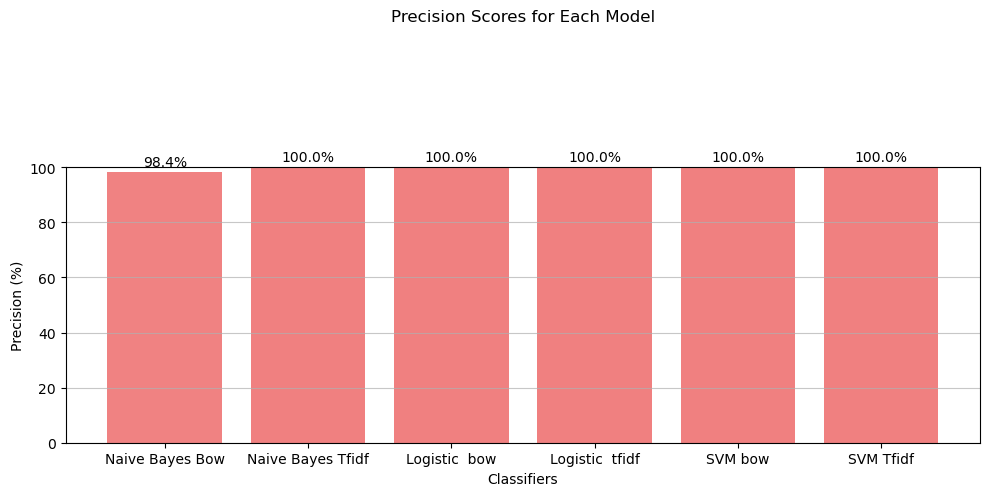

In [302]:
import numpy as np
import matplotlib.pyplot as plt

#define and declare classifiers name
classifiers = ['Naive Bayes Bow','Naive Bayes Tfidf','Logistic  bow', 'Logistic  tfidf', 'SVM bow', 'SVM Tfidf']

#Array for score
precision_scores = [precision_nb_bow, precision_nb_tfidf, precision_logistic_bow, precision_logistic_tfidf, precision_svm_bow, precision_svm_tfidf]

#Calculating percentage based on precision 
percentage_scores = [precision * 100 for precision in precision_scores]

maximum_score = max(percentage_scores)
opacity = [score / maximum_score for score in percentage_scores]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, percentage_scores, color='lightcoral')

# Set transparency for each bar based on the opacity list
for bar, opa in zip(bars, opacity):
    bar.set_alpha(opa)

# Displaying the percentages on the bars
for bar, percentage in zip(bars, percentage_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{percentage:.1f}%', ha='center', va='bottom')

# Adding title and labels
plt.title('Precision Scores for Each Model',y=1.5)
plt.xlabel('Classifiers')
plt.ylabel('Precision (%)')

plt.grid(axis='y', alpha=0.7)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()




With high precision and acceptable ROC-AUC scores, the Multinomial Naive Bayes model with both Bag of Words and TF-IDF worked well.

Despite achieving 100% precision, the Logistic Regression model with Bag of Words has a lower ROC-AUC, suggesting that it might not be able to distinguish between classes perfectly.

The TF-IDF in the Logistic Regression model did not perform well, as evidenced by lower ROC-AUC.

The ROC-AUC scores of the SVM model using both Bag of Words and TF-IDF were lower than those of the Naive Bayes models, despite the model's perfect precision.

The SVM model with TF-IDF achieved the best ROC-AUC score and overall performance of all the models.

### Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code.
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

###  Submission details
Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

### NOTE: Only one team member will submit the file.